In [106]:
import numpy as np
import os
import pandas as pd

#Accuracy measurement
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle


#Visualaization
import seaborn as sns
import matplotlib.pyplot as plt


#Model Module
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Activation, Flatten
from tensorflow.keras import backend as bk

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adamax
from tensorflow.keras.models import Sequential


from tqdm import tqdm
import cv2

In [2]:
# 1. Augmentation
    # 1. Dynamic
    # 2. Static
# 2. Segmentation
# 3. Anotation

In [3]:
# # Overfitting
#     1.  EarlyStoping
#     2. Dropout
#     3. Regularization

In [4]:
classNames = ["cats", 'dogs']
classNameslabels = {classnames: i for i, classnames in enumerate(classNames)}

In [5]:
print(classNameslabels)

{'cats': 0, 'dogs': 1}


In [6]:
print(len(classNameslabels))

2


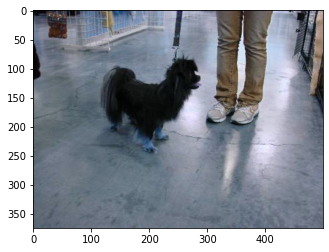

In [7]:
# H/W -- Split the file name and extrat the class names 
imageData = cv2.imread("dataset/training_set/dogs/dog.1000.jpg")
plt.imshow(imageData)
plt.show()

In [8]:
print(imageData.shape)

(375, 499, 3)


In [9]:
image_shape = (128, 128)

In [42]:
def datasetLoaderFromDirectory():
    #Load datasets from folder
    dataset_path = ["dataset/training_set/", "dataset/test_set/"]
    #Store data into the list with their paths
    imageataOutput = []
    # Tag each data path file
    for i in dataset_path:
        #List for image ata
        images = []
        #list for class names
        labels = []
        print("Counting : {}".format(i))

            
        for j in os.listdir(i):
            label = classNameslabels[j]
            for imagedatafile in tqdm(os.listdir(os.path.join(i, j))):
                
                imagePath = os.path.join(os.path.join(i, j), imagedatafile)
                
                #image Read & Preprocessing
                image = cv2.imread(imagePath)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, image_shape)
                
                #print("Images: ", image)
                
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = "float32")
        labels = np.array(labels, dtype = 'float32')
        #print(images)
        imageataOutput.append((images, labels))
    
    return imageataOutput

In [44]:
#datasetLoaderFromDirectory()

In [35]:
#(train_image, train_labesl), (test_image, test_labels) = shuffle(datasetLoaderFromDirectory())

In [45]:
(train_image, train_labels), (test_image, test_labels) = datasetLoaderFromDirectory()

Counting : dataset/training_set/


100%|██████████████████████████████████████| 4000/4000 [00:08<00:00, 489.70it/s]


Counting : dataset/test_set/


100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 545.94it/s]


In [46]:
train_images, train_labels = shuffle(train_image, train_labels, random_state = 26)

In [47]:
#help(shuffle)

In [51]:
train_labels[5]

1.0

In [52]:
_, trainImageLabelInfo = np.unique(train_labels, return_counts=True)
_, testImageLabelInfo = np.unique(test_labels, return_counts = True)

In [57]:
print("Train Image Label information for 0 Class: ", trainImageLabelInfo[0])
print("Train Image Label information for 1 Class: ", trainImageLabelInfo[1])

print("---------------------------------------------------")

print("Test Image Label information for 0 Class: ", testImageLabelInfo[0])
print("Test Image Label information for 1 Class: ", testImageLabelInfo[1])

Train Image Label information for 0 Class:  4000
Train Image Label information for 1 Class:  4000
---------------------------------------------------
Test Image Label information for 0 Class:  1000
Test Image Label information for 1 Class:  1000


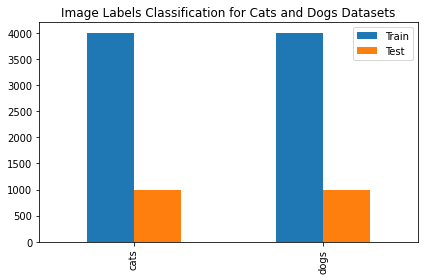

In [62]:
# Creating Dataframe for stroing image labels metadata
# Using Dictionary concept

pd.DataFrame({"Train":trainImageLabelInfo,
            "Test": testImageLabelInfo}, 
             index = classNames
            ).plot.bar()
# plt.plot()
# plt.bar()
plt.title("Image Labels Classification for Cats and Dogs Datasets")
plt.grid(False)
plt.tight_layout()
plt.show()

#### Home Work: Create a Pie chart using above concept

In [65]:
# Read one image features
imageFeature = train_images[0] # Image feature value should be in range between [0, 255]
#np.unique(imageFeature)
len(np.unique(imageFeature))

240

In [66]:
# Scaleing image featues 
train_images = train_images/255.0
test_image = test_image/255.0

In [69]:
#train_images[0]
#np.unique(train_images[0])
len(np.unique(train_images[0]))

240

In [76]:
#train_images.shape[0]
#np.random.randint(train_images.shape[0])
train_images.shape # (8000, 128, 128, 3) --> (Number of Image, Image_W, Image_H, Number of Color channle)

(8000, 128, 128, 3)

In [87]:
#train_labels[345]

1.0

In [117]:
# Now Read an image after Scalling
def ImageVisualization(classNames, imagePath, imagelabel):
    #Create an index for indivudual Image
    index = np.random.randint(imagePath.shape[0]) # Index always int
    
    plt.figure()# Define Frame size
    plt.imshow(imagePath[index])
    
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.tight_layout()
    
    plt.title("Index of this Image is: {}".format(index) + " And Class is : "+classNames[int(imagelabel[index])])
    plt.show()

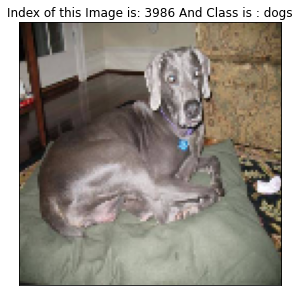

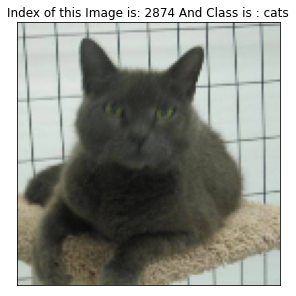

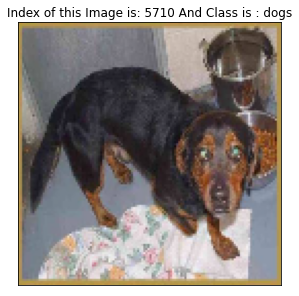

In [96]:
# Home Work: + and Actual is Class Names

for i in range(1, 4):
    ImageVisualization(classNames, train_images, train_labels)

In [101]:
# Home Work: Visualize Image at shape of (3, 3)
# Now Read an image after Scalling
def ImageVisualization2(classNames, imagePath, imagelabel):
    
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle("Random Image Visualization", fontsize = 20 )
    
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.tight_layout()
        
        plt.imshow(imagePath[i], cmap = plt.cm.binary)
        plt.xlabel("Class Names: {}".format(classNames[int(imagelabel[i])]))
    plt.show()

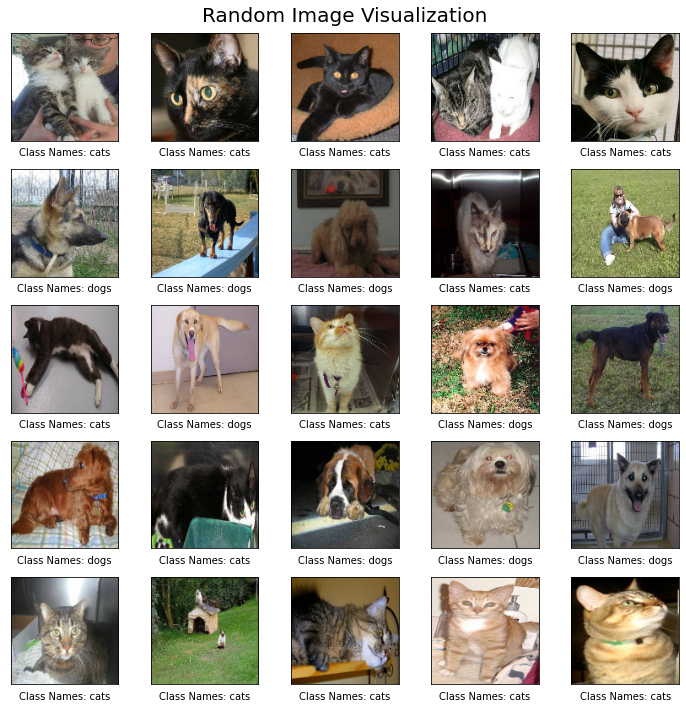

In [102]:
ImageVisualization2(classNames, train_images, train_labels)

In [105]:
train_images.shape

(8000, 128, 128, 3)

In [108]:
model = Sequential([
    
    # Input Layer
    
    Conv2D(32, (3, 3), activation = "relu", input_shape = (128, 128, 3)),
    MaxPooling2D(2, 2),
    
    #1st Hidden Layer

    Conv2D(64, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    
     #2nd Hidden Layer
    
    Conv2D(128, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    #3rd Hidden Layer
    
    Conv2D(256, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    
    Flatten(),
    
    # Connected Layer
    
    Dense(256, activation = "relu"),
    Dense(2, activation = "softmax")
])

2022-08-14 21:38:16.408847: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [109]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [110]:
model.compile(optimizer = 'adam',
             loss = "sparse_categorical_crossentropy",
             metrics = ['accuracy'])

In [112]:
modelData = model.fit(train_images,
                     train_labels,
                      epochs = 10,
                     batch_size = 128,
                     validation_split=0.2)

Epoch 1/10
50/50 [==============================] - 62s 1s/step - loss: 0.7010 - accuracy: 0.5178 - val_loss: 0.6847 - val_accuracy: 0.5331
Epoch 2/10
50/50 [==============================] - 67s 1s/step - loss: 0.6683 - accuracy: 0.5958 - val_loss: 0.6362 - val_accuracy: 0.6375
Epoch 3/10
50/50 [==============================] - 65s 1s/step - loss: 0.5979 - accuracy: 0.6798 - val_loss: 0.5356 - val_accuracy: 0.7219
Epoch 4/10
50/50 [==============================] - 67s 1s/step - loss: 0.5406 - accuracy: 0.7325 - val_loss: 0.5203 - val_accuracy: 0.7350
Epoch 5/10
50/50 [==============================] - 75s 1s/step - loss: 0.5018 - accuracy: 0.7586 - val_loss: 0.4949 - val_accuracy: 0.7625
Epoch 6/10
50/50 [==============================] - 72s 1s/step - loss: 0.4543 - accuracy: 0.7823 - val_loss: 0.4459 - val_accuracy: 0.8044
Epoch 7/10
50/50 [==============================] - 66s 1s/step - loss: 0.3994 - accuracy: 0.8189 - val_loss: 0.4319 - val_accuracy: 0.7981
Epoch 8/10
50/50 [==

In [145]:
def accuracy_and_loss_Plot(modelData):
    
    fig = plt.figure(figsize = (10, 10))
    
    plt.subplot(221)
    plt.plot(modelData.history["accuracy"], 'bo--', label = 'accuracy')
    plt.plot(modelData.history["val_accuracy"], 'ro--', label = 'val_accuracy')
    plt.title("Training Data Accuracy Measurement")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy Information")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    
    
    plt.subplot(222)
    plt.plot(modelData.history["loss"], 'bo--', label = 'loss')
    plt.plot(modelData.history["val_loss"], 'ro--', label = 'val_loss')
    plt.title("Training Data Loss Measurement")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss Information")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.show()

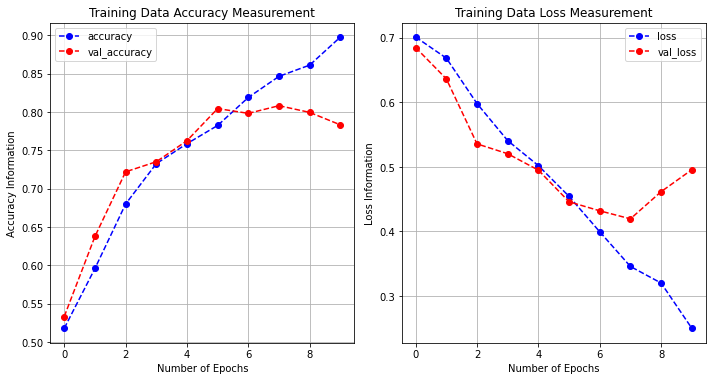

In [146]:
accuracy_and_loss_Plot(modelData)

In [115]:
testLoss = model.evaluate(test_image, test_labels)

63/63 [==============================] - 7s 102ms/step - loss: 0.5387 - accuracy: 0.7735


63/63 [==============================] - 6s 100ms/step


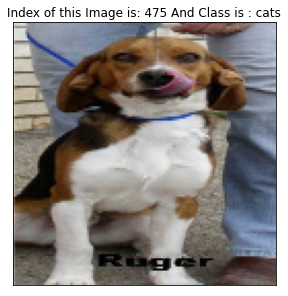

In [118]:
predictedData = model.predict(test_image)
predictedDataLabels = np.argmax(predictedData, axis = 1)
ImageVisualization(classNames, test_image, predictedDataLabels)

In [121]:
# # Home Work: + and Actual is Class Names
# for i in range(1, 10):
#     ImageVisualization(classNames, test_image, predictedDataLabels)

In [139]:
def missClassification(classNames, ImageData, ImageLabels, predictedDataLabels):
    
    result = (ImageLabels == predictedDataLabels)
    #print(result)
    missClass = np.where(result == 0)
    #print(int(missClass))
    
    missClassImage = imageData[missClass]
    missClasslabels = predictedDataLabels[missClass]
    
    print("Miss Classification Image Data is: ")
    ImageVisualization2(classNames, missClassImage, missClasslabels)

In [141]:
missClassification(classNames, test_image, test_labels, predictedDataLabels)

IndexError: index 378 is out of bounds for axis 0 with size 375

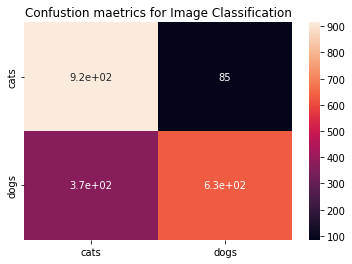

In [142]:
Cm = confusion_matrix(test_labels, predictedDataLabels)
ax = plt.axes()
sns.heatmap(Cm, annot=True, 
           annot_kws={'size':10}, 
           xticklabels=classNames,
           yticklabels=classNames, 
           ax = ax)

plt.title("Confustion maetrics for Image Classification")
plt.show()